In [ ]:
# import library
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [ ]:
# create dataframe from csv file
data = pd.read_csv('dataset_beras_lstm.csv', index_col='Tanggal', parse_dates=True)
data.tail(30)

,Premium,Medium
Tanggal,,
2025-05-22,14500.0,13500.0
2025-05-23,14500.0,13500.0
2025-05-24,14500.0,13500.0
2025-05-25,14500.0,13500.0
2025-05-26,14500.0,13500.0
2025-05-27,14500.0,13500.0
2025-05-28,14500.0,13500.0
2025-05-29,14500.0,13500.0
2025-05-30,14750.0,13500.0


<Axes: xlabel='Tanggal'>

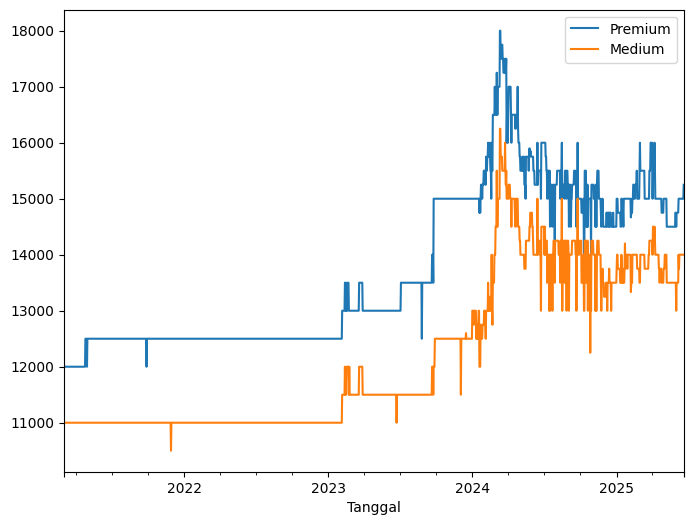

In [ ]:
# plot data
data.plot()

In [ ]:
# Beras Medium
# Scaling Data menggunakan minmax scaller
min_max_scaler = MinMaxScaler(feature_range=(1, 2))
dataset = min_max_scaler.fit_transform(
    data['Medium'].values.reshape(-1, 1)
    )

In [ ]:
data_awal = data['Medium'].values.reshape(-1)
data_minmax = dataset.reshape(-1)
# data_predict
new_df = {
    "data asli" : data_awal,
    "min-max": data_minmax
}

dataframe = pd.DataFrame(new_df)
dataframe.sample(10)
# data_minmax

,data asli,min-max
555,11000.0,1.086957
8,11000.0,1.086957
379,11000.0,1.086957
227,11000.0,1.086957
1428,14000.0,1.608696
532,11000.0,1.086957
1443,14000.0,1.608696
1103,15000.0,1.782609
1094,14000.0,1.608696
691,11000.0,1.086957


In [ ]:
# membuat fungsi window dataset
def windowed_dataset(dataset, window_size=30):
    dataX, dataY = [], []
    for i in range(len(dataset)-window_size-1):
        a = dataset[i:(i+window_size), 0]
        dataX.append(a)
        dataY.append(dataset[i + window_size, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# split data menjadi data train dan data validasi
train_size = int(len(dataset) * 0.8)
validation_size = len(dataset) - train_size
train, validation = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(validation))

1258 315


In [ ]:
# Parameters
window_size = 30

# membuat window data train dan validation
x_train, y_train = windowed_dataset(train, window_size)
x_validation, y_validation = windowed_dataset(validation, window_size)
x_train[0]


array([1.08695652, 1.08695652, 1.08695652, 1.08695652, 1.08695652,
       1.08695652, 1.08695652, 1.08695652, 1.08695652, 1.08695652,
       1.08695652, 1.08695652, 1.08695652, 1.08695652, 1.08695652,
       1.08695652, 1.08695652, 1.08695652, 1.08695652, 1.08695652,
       1.08695652, 1.08695652, 1.08695652, 1.08695652, 1.08695652,
       1.08695652, 1.08695652, 1.08695652, 1.08695652, 1.08695652])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

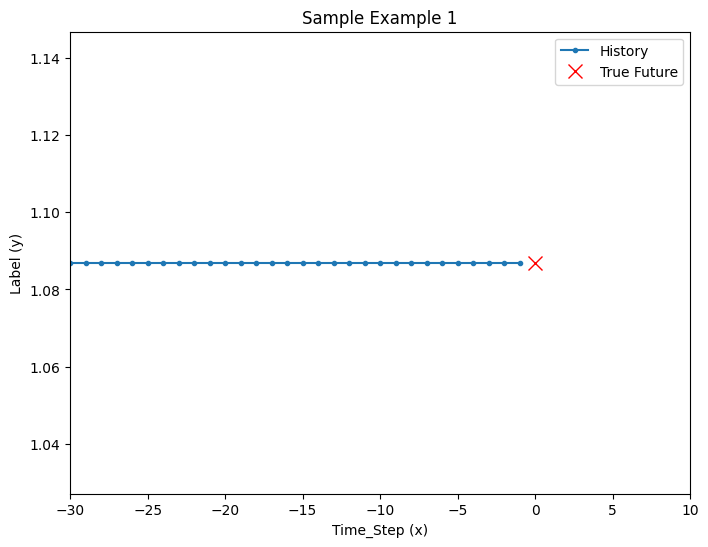

In [ ]:
### fucntion to create time steps
def create_time_steps(length):
  return list(range(-length,0))

### function to plot time series data

def plot_time_series(plot_data, delta , title):
  labels = ["History" , 'True Future' , 'Model Predcited']
  marker = ['.-' , 'rx' , 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])

  if delta:
    future = delta
  else:
    future = 0
  plt.title(title)
  for i , x in enumerate(plot_data):
    if i :
      plt.plot(future , plot_data[i] , marker[i], markersize = 10 , label = labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label = labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5) *2])

  plt.xlabel('Time_Step (x)')
  plt.ylabel('Label (y)')

  return plt

plot_time_series([x_train[0] , y_train[0]] , 0 , 'Sample Example 1')

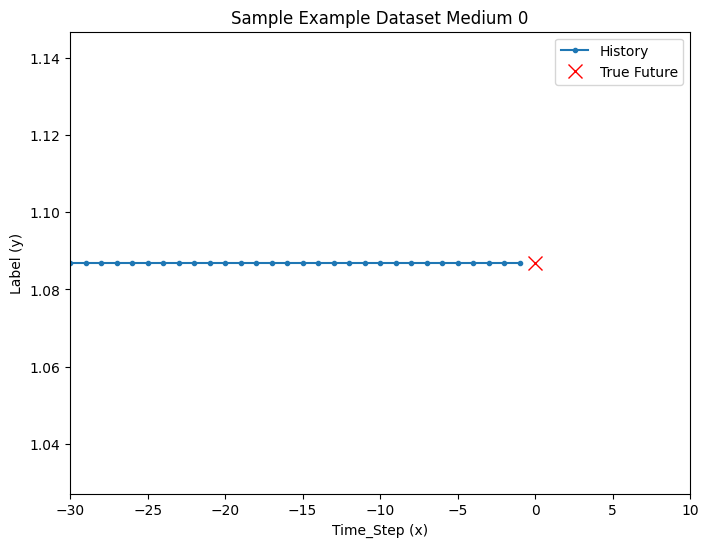

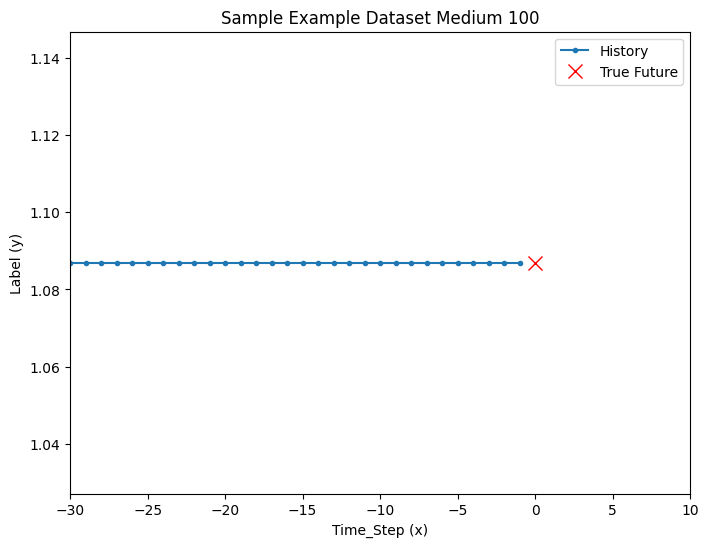

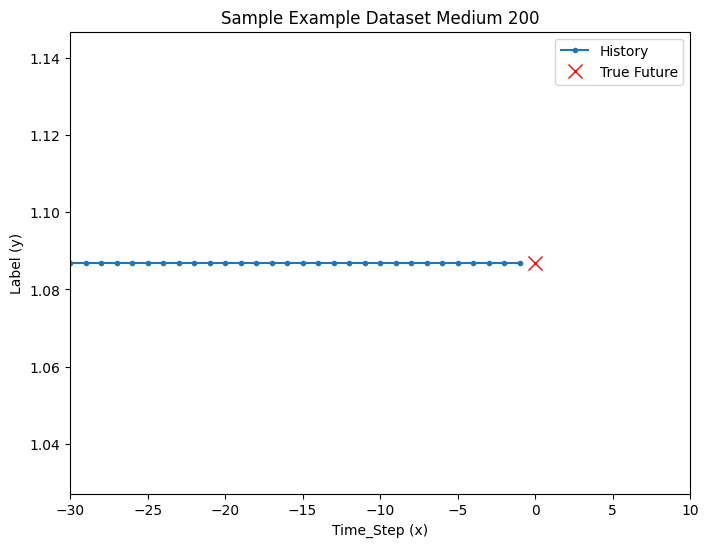

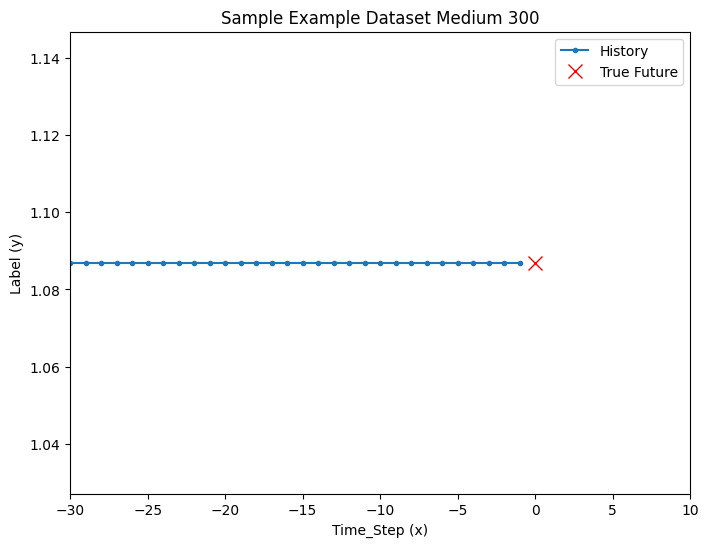

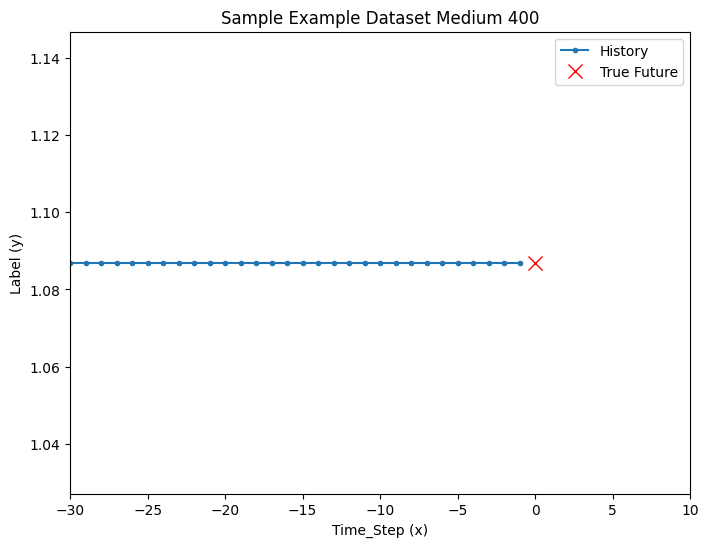

In [ ]:
n_data = [0, 100, 200, 300, 400]
for i in n_data:
    plot = plot_time_series([x_train[i] , y_train[i]] , 0 , f'Sample Example Dataset Medium {i}')
    plot.show()

In [ ]:
value_train = {}
for i, j in enumerate(x_train[0]):
    value_train[f"x{i+1}"] = [j]

value_train['y'] = y_validation[0]

df_windows = pd.DataFrame(value_train)
df_windows.sample(20, replace=True)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,y
0,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,...,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.608696
0,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,...,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.608696
0,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,...,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.608696
0,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,...,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.608696
0,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,...,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.608696
0,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,...,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.608696
0,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,...,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.608696
0,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,...,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.608696
0,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,...,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.608696
0,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,...,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.086957,1.608696


In [ ]:
# cek dimensi data yang sudah dibuat menjadi window dataset
print(f"x train : {x_train.shape}")
print(f"y train : {y_train.shape}")
print(f"x validation : {x_validation.shape}")
print(f"y validation : {y_validation.shape}")

x train : (1227, 30)
y train : (1227,)
x validation : (284, 30)
y validation : (284,)


In [ ]:
# reshape data
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_validation = np.reshape(x_validation, (x_validation.shape[0], 1, x_validation.shape[1]))

In [ ]:
## prepare tensorflow dataset
batch_size = 256
buffer_size = 10000

train_dataset = tf.data.Dataset.from_tensor_slices((x_train , y_train))
train_dataset = train_dataset.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_dataset = tf.data.Dataset.from_tensor_slices((x_validation , y_validation))
val_dataset = val_dataset.cache().shuffle(buffer_size).batch(batch_size).repeat()

print(train_dataset)
print(val_dataset)

<_RepeatDataset element_spec=(TensorSpec(shape=(None, 1, 30), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<_RepeatDataset element_spec=(TensorSpec(shape=(None, 1, 30), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [ ]:
# membuat model lstm menggunakan keras
model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.LSTM(40, input_shape=(1, window_size))),
model.add(tf.keras.layers.Dense(1))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 40)             │        11,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,401 (44.54 KB)

 Trainable params: 11,401 (44.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# set loss dan optimizer training data
optimizer = 'adam'

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# train model
steps = 200
EPOCHS = 200
history = model.fit(train_dataset , epochs = EPOCHS, steps_per_epoch = steps ,
               validation_data = val_dataset, validation_steps = 50)

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1114 - mse: 0.1114 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.8585e-04 - mse: 9.8585e-04 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.3142e-04 - mse: 9.3142e-04 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 7/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.8651e-04 - mse: 8.8651e-04 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 8/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.6505e-04 - mse: 8.6505e-04 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 9/200
200

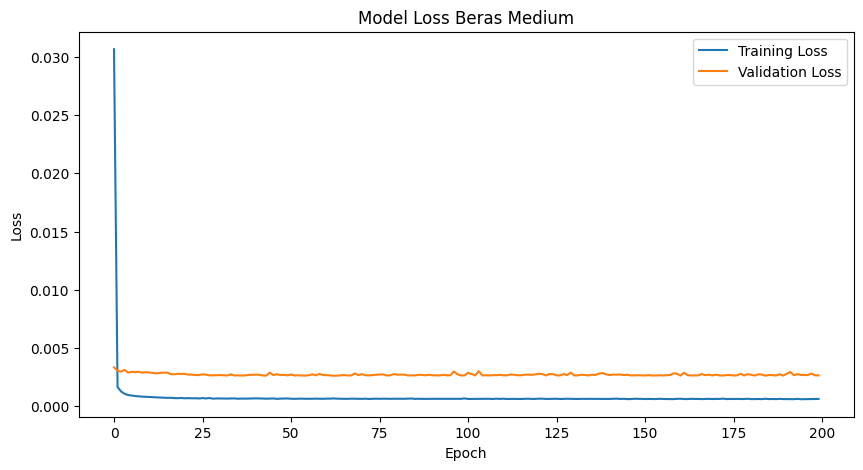

In [ ]:
# Plot loss and accuracy selama training
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Beras Medium')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_validation)

# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_validation])

# calculate root mean squared error
trainScore = sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Train Score: 139.71 RMSE
Test Score: 296.45 RMSE


In [ ]:
def calculate_mape(actual, predicted) -> float:
  mape = np.mean(np.abs((actual - predicted)/actual))*100
  return mape

In [ ]:
# calculate root mean squared error
trainScore = calculate_mape(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAPE' % (trainScore))
testScore = calculate_mape(testY[0], testPredict[:,0])
print('Test Score: %.2f MAPE' % (testScore))

Train Score: 0.49 MAPE
Test Score: 1.35 MAPE


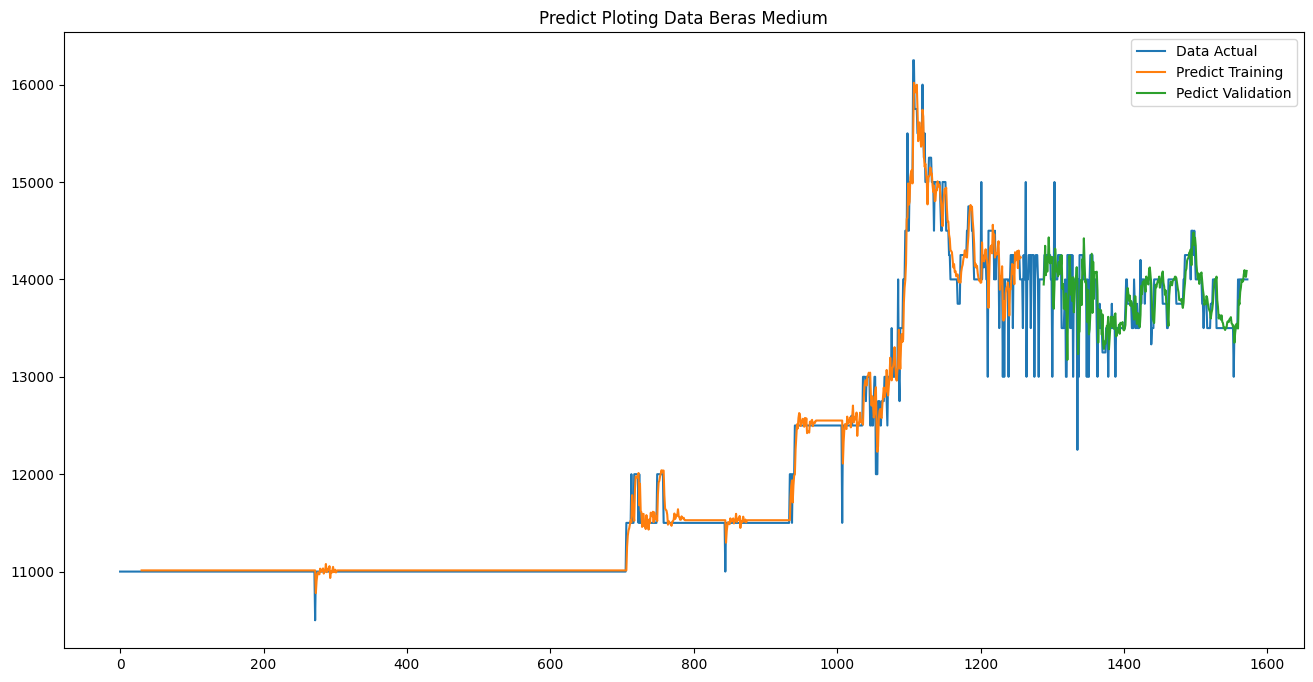

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window_size:len(trainPredict)+window_size, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(window_size*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.plot(min_max_scaler.inverse_transform(dataset), label='Data Actual')
plt.plot(trainPredictPlot, label='Predict Training')
plt.plot(testPredictPlot, label='Pedict Validation')
plt.title('Predict Ploting Data Beras Medium')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


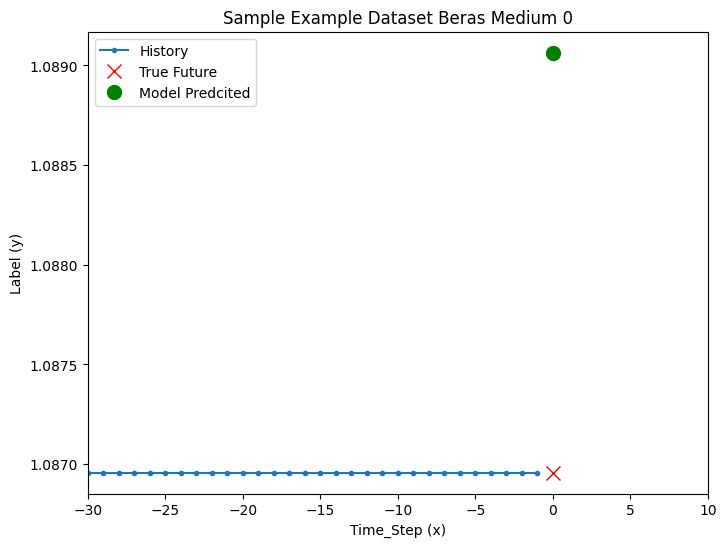

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


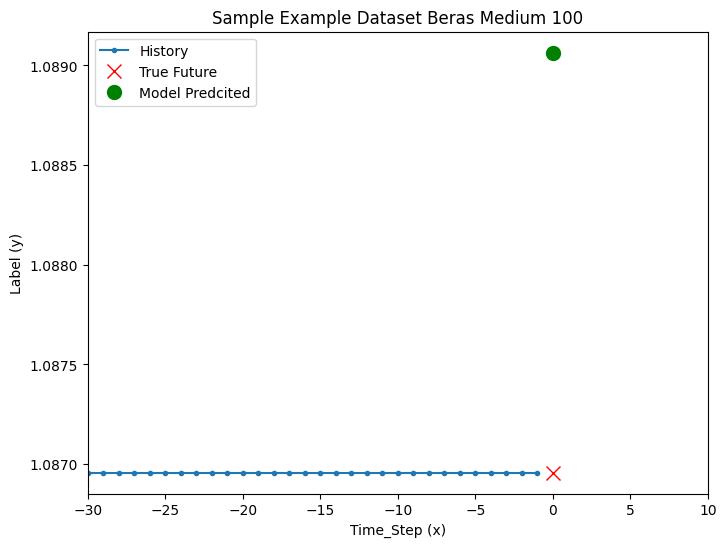

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


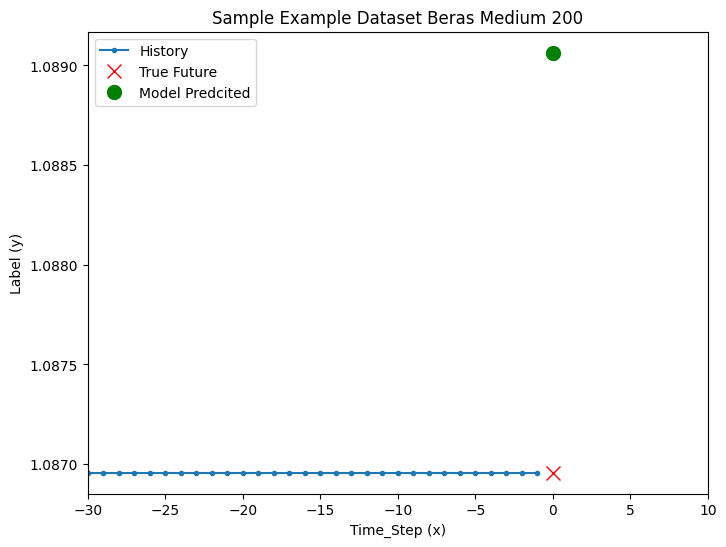

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


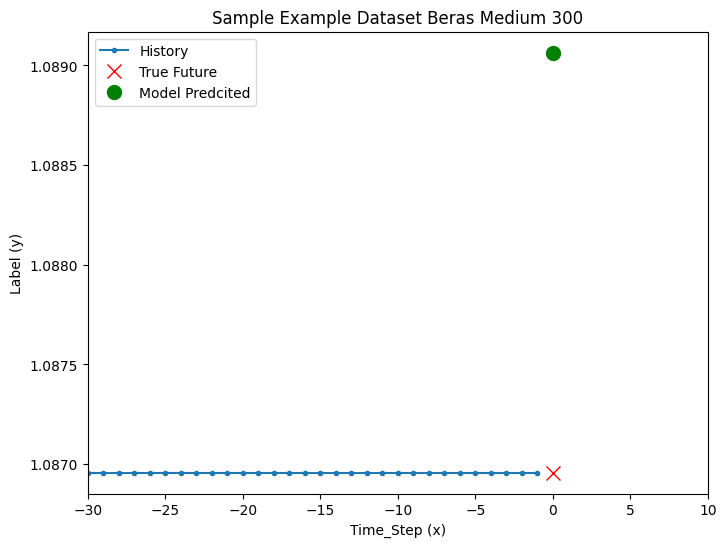

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


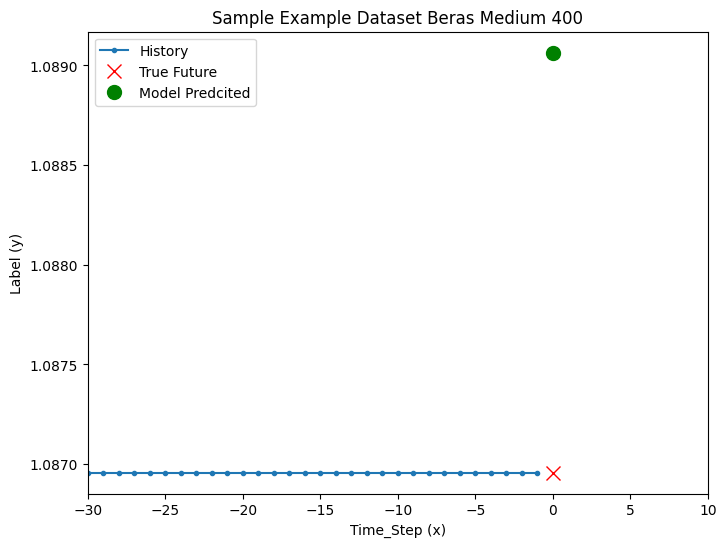

In [ ]:
n_data = [0, 100, 200, 300, 400]
for i in n_data:

    dapapred = np.reshape(x_train[i], (x_train[i].shape[0], 1, x_train[i].shape[1]))

    plot = plot_time_series([x_train[i].reshape(-1) , y_train[i], model.predict(dapapred)] , 0 , f'Sample Example Dataset Beras Medium {i}')
    plot.show()

In [ ]:
data_awal_predict = dataset[-20:]
data_awal_predict_reshape = np.reshape(data_awal_predict, (data_awal_predict.shape[1], 1, data_awal_predict.shape[0]))
data_awal_predict_reshape.shape

(1, 1, 20)

In [ ]:
data_awal = data[window_size:500+window_size]
data_predict = trainPredict[:500]

# data_predict medium
new_df = {
    "Tanggal" : data_awal.index,
    "Harga Aktual" : data_awal['Medium'].values,
    "Harga Prediksi": data_predict.reshape(-1)
}

dataframe = pd.DataFrame(new_df)
dataframe.sample(10)

,Tanggal,Harga Aktual,Harga Prediksi
339,2022-03-05,11000.0,11012.119141
239,2021-11-25,11000.0,11012.119141
39,2021-05-09,11000.0,11012.119141
483,2022-07-27,11000.0,11012.119141
372,2022-04-07,11000.0,11012.119141
194,2021-10-11,11000.0,11012.119141
49,2021-05-19,11000.0,11012.119141
431,2022-06-05,11000.0,11012.119141
236,2021-11-22,11000.0,11012.119141
162,2021-09-09,11000.0,11012.119141


In [ ]:
# KODE UNTUK PREDIKSI 30 HARI KE DEPAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Menentukan jumlah hari untuk prediksi
n_future = 30

# Mengambil data sekuens terakhir dari dataset utama sebagai input awal
last_sequence = dataset[-window_size:]
current_batch = last_sequence.reshape(1, 1, window_size)

# Looping untuk melakukan prediksi
future_predictions = []
for i in range(n_future):
    # Prediksi 1 hari ke depan
    current_pred = model.predict(current_batch)[0]

    # Simpan hasil prediksi
    future_predictions.append(current_pred)

    # Update batch input: hapus data pertama dan tambahkan hasil prediksi di akhir
    # Reshape current_pred agar sesuai untuk digabungkan
    reshaped_pred = current_pred.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, :, 1:], reshaped_pred, axis=2)

# Mengembalikan hasil prediksi ke skala harga aslinya
future_predictions_inversed = min_max_scaler.inverse_transform(future_predictions)

# Membuat rentang tanggal untuk 30 hari ke depan
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_future)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

In [ ]:
# Membuat DataFrame untuk hasil prediksi
df_past = data[['Premium']].reset_index()
df_past.rename(columns={'Tanggal': 'Tanggal', 'Premium': 'Data Aktual'}, inplace=True)

df_future = pd.DataFrame({
    'Tanggal': future_dates,
    'Prediksi 30 Hari ke Depan': future_predictions_inversed.flatten()
})

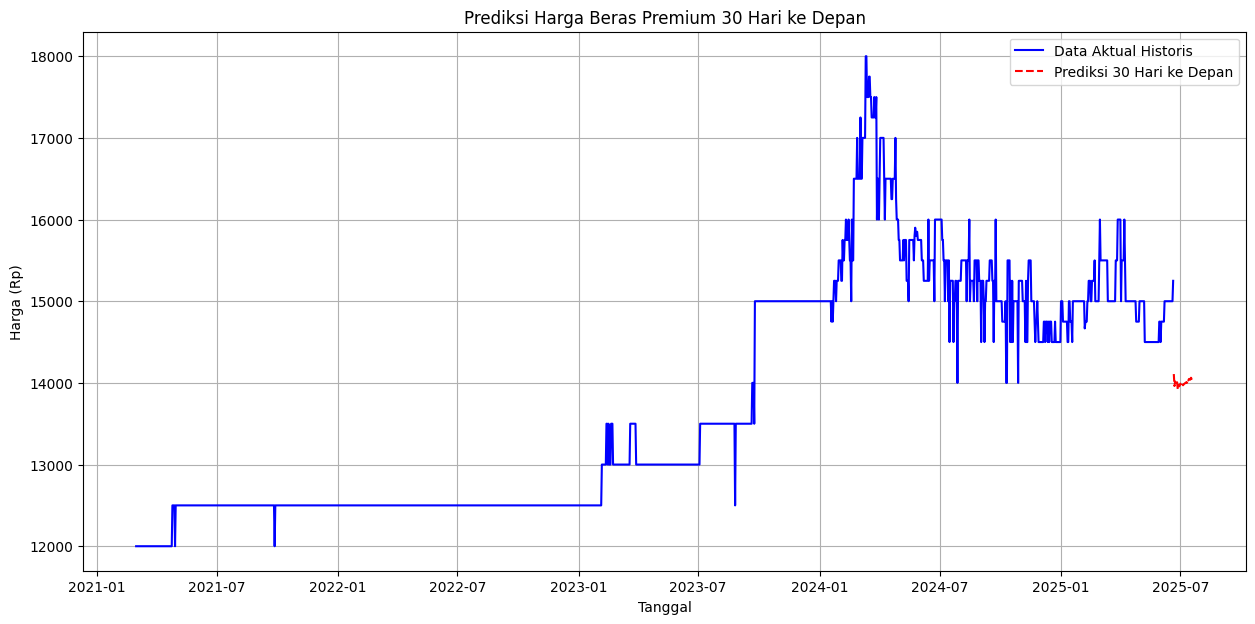

In [ ]:
# Visualisasi hasil
plt.figure(figsize=(15, 7))
plt.plot(df_past['Tanggal'], df_past['Data Aktual'], label='Data Aktual Historis', color='blue')
plt.plot(df_future['Tanggal'], df_future['Prediksi 30 Hari ke Depan'], label='Prediksi 30 Hari ke Depan', color='red', linestyle='--')
plt.title('Prediksi Harga Beras Premium 30 Hari ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Harga (Rp)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Menampilkan tabel hasil prediksi
print("Tabel Prediksi Harga 30 Hari ke Depan:")
print(df_future.to_string())

Tabel Prediksi Harga 30 Hari ke Depan:
      Tanggal  Prediksi 30 Hari ke Depan
0  2025-06-21               14108.119845
1  2025-06-22               13961.927712
2  2025-06-23               14017.086148
3  2025-06-24               13979.385525
4  2025-06-25               13974.980801
5  2025-06-26               14007.227272
6  2025-06-27               13919.591367
7  2025-06-28               13974.594206
8  2025-06-29               13956.888944
9  2025-06-30               13970.101744
10 2025-07-01               13990.793526
11 2025-07-02               13970.019490
12 2025-07-03               13993.224829
13 2025-07-04               13982.095808
14 2025-07-05               13971.241653
15 2025-07-06               13982.447445
16 2025-07-07               13988.470525
17 2025-07-08               13996.127039
18 2025-07-09               14001.254231
19 2025-07-10               14008.624226
20 2025-07-11               14001.440674
21 2025-07-12               14043.346554
22 2025-07-13     

In [ ]:
import pickle
# Beras Medium
# Menyimpan Model Keras ke dalam Format H5
nama_file_model = 'model_prediksi_beras_medium.h5'
model.save(nama_file_model)

print(f"Model berhasil disimpan sebagai '{nama_file_model}'")

# Menyimpan Scaler menggunakan Pickle
nama_file_scaler = 'scaler_medium.pkl'
with open(nama_file_scaler, 'wb') as file:
    pickle.dump(min_max_scaler, file)

print(f"Scaler berhasil disimpan sebagai '{nama_file_scaler}'")

Model berhasil disimpan sebagai 'model_prediksi_beras_medium.h5'
Scaler berhasil disimpan sebagai 'scaler_medium.pkl'
